In [12]:
#Importation des librairies de bases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importation des librairies de sklearn
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline



import warnings
warnings.filterwarnings("ignore")

# Ouverture de fichier

## Application train et test

In [29]:
############################################################
def tauxRemplissage(df):
    """
    Entrée : DataFrame
    Objectifs : Calcul du taux de remplissage, 1 beaucoup de données, 0 beaucoup de valeurs manquantes
    Sorties : DataFrame
    """

    val = 1 - df.isna().sum()/len(df)
    val = pd.DataFrame(val)
    val = val.transpose()
    return val
    #######################################################
def graphRemplissage(df) :
    """
    Entrée : Dataframe
    Objectifs : Récupérer la DataFrame du taux de remplissage et afficher le graphique du taux de remplissage
    Sortie : Graphe
    """

    df = tauxRemplissage (df)
    fig,ax = plt.subplots()
    ax.tick_params(axis='x', rotation=90)
    sns.barplot( data=df, color = 'blue')
    plt.xlabel('\nColonnes')
    plt.ylabel('Taux de valeurs\n')
    plt.title("Taux de remplissage")
    plt.show()
    ################################################""""

Les deux tableaux suivant sont des jeux de données entraînés et à tester. Une ligne représente un prêt dans notre échantillon de données. Le jeu de donnée est dans un autre fichier, tous les fichiers (.csv) seront mis dans ce dossier.

In [10]:
app_train = pd.read_csv("data/application_train.csv")
app_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


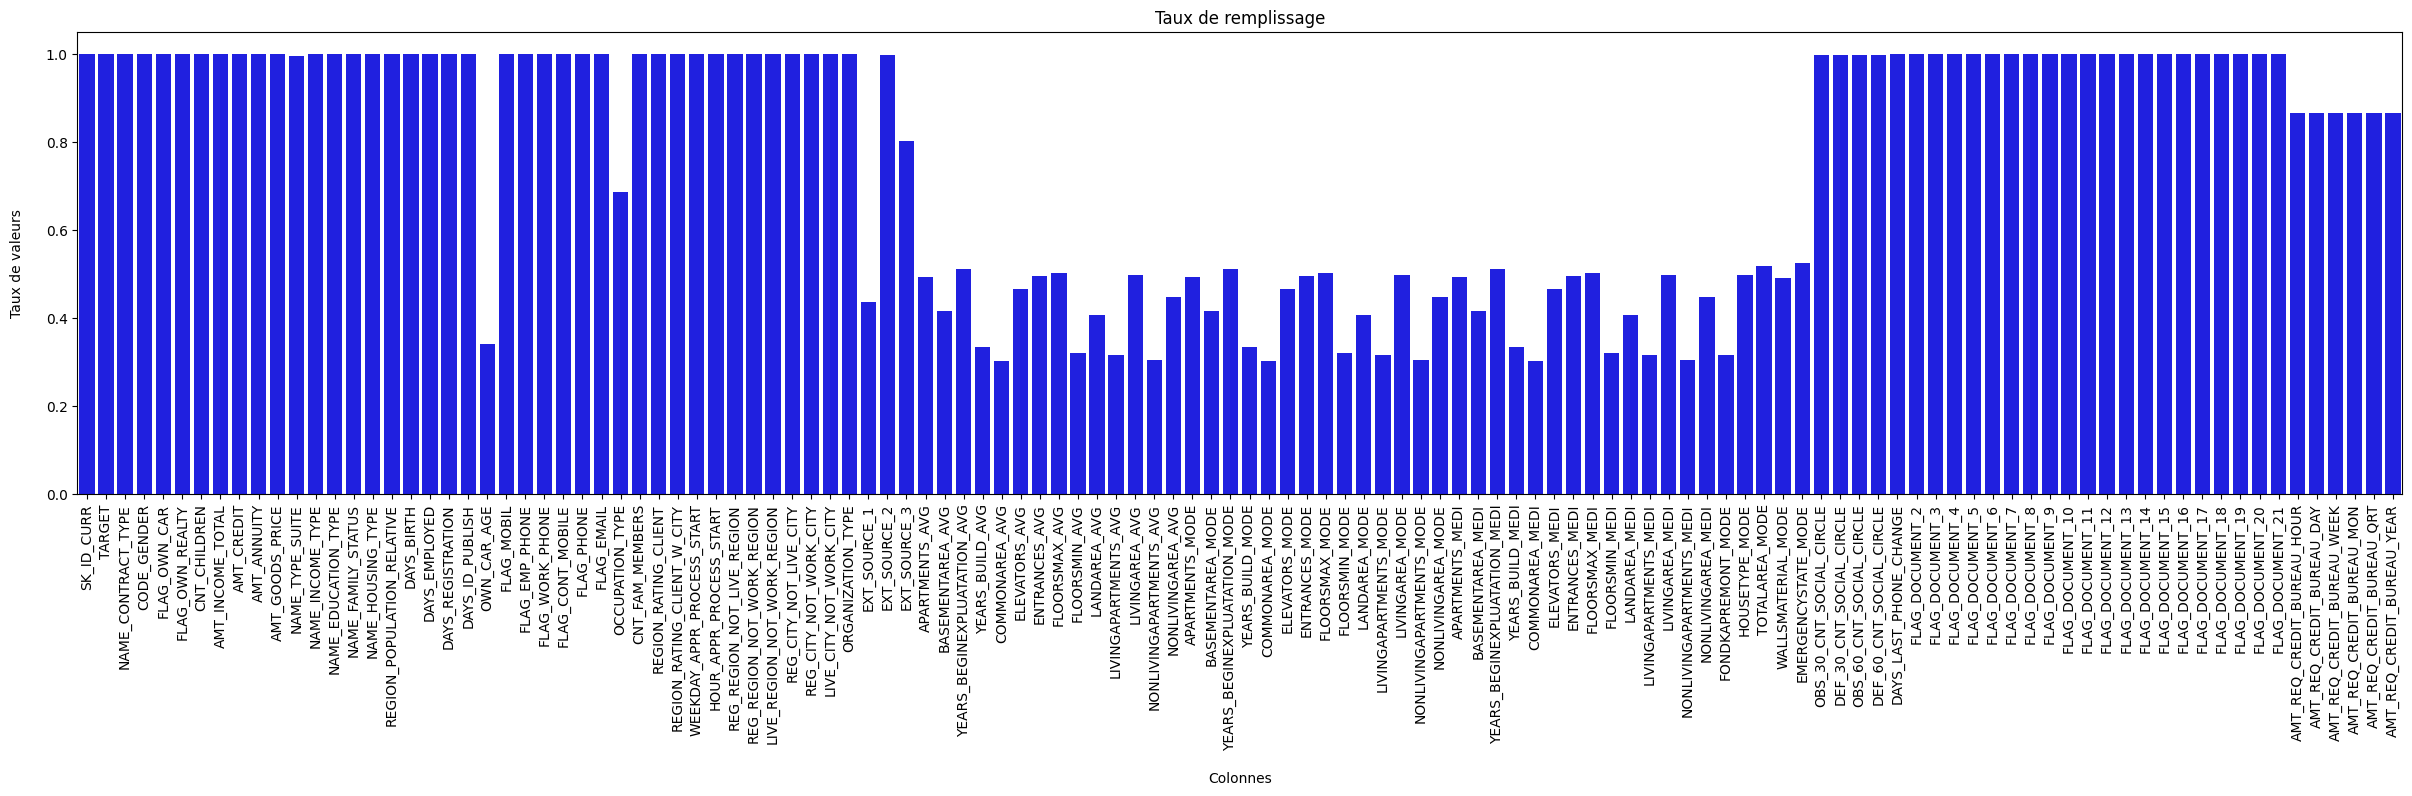

In [17]:
plt.rcParams["figure.figsize"] = (30, 6)
graphRemplissage(app_train)

In [18]:
app_test = pd.read_csv("data/application_test.csv")
app_test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


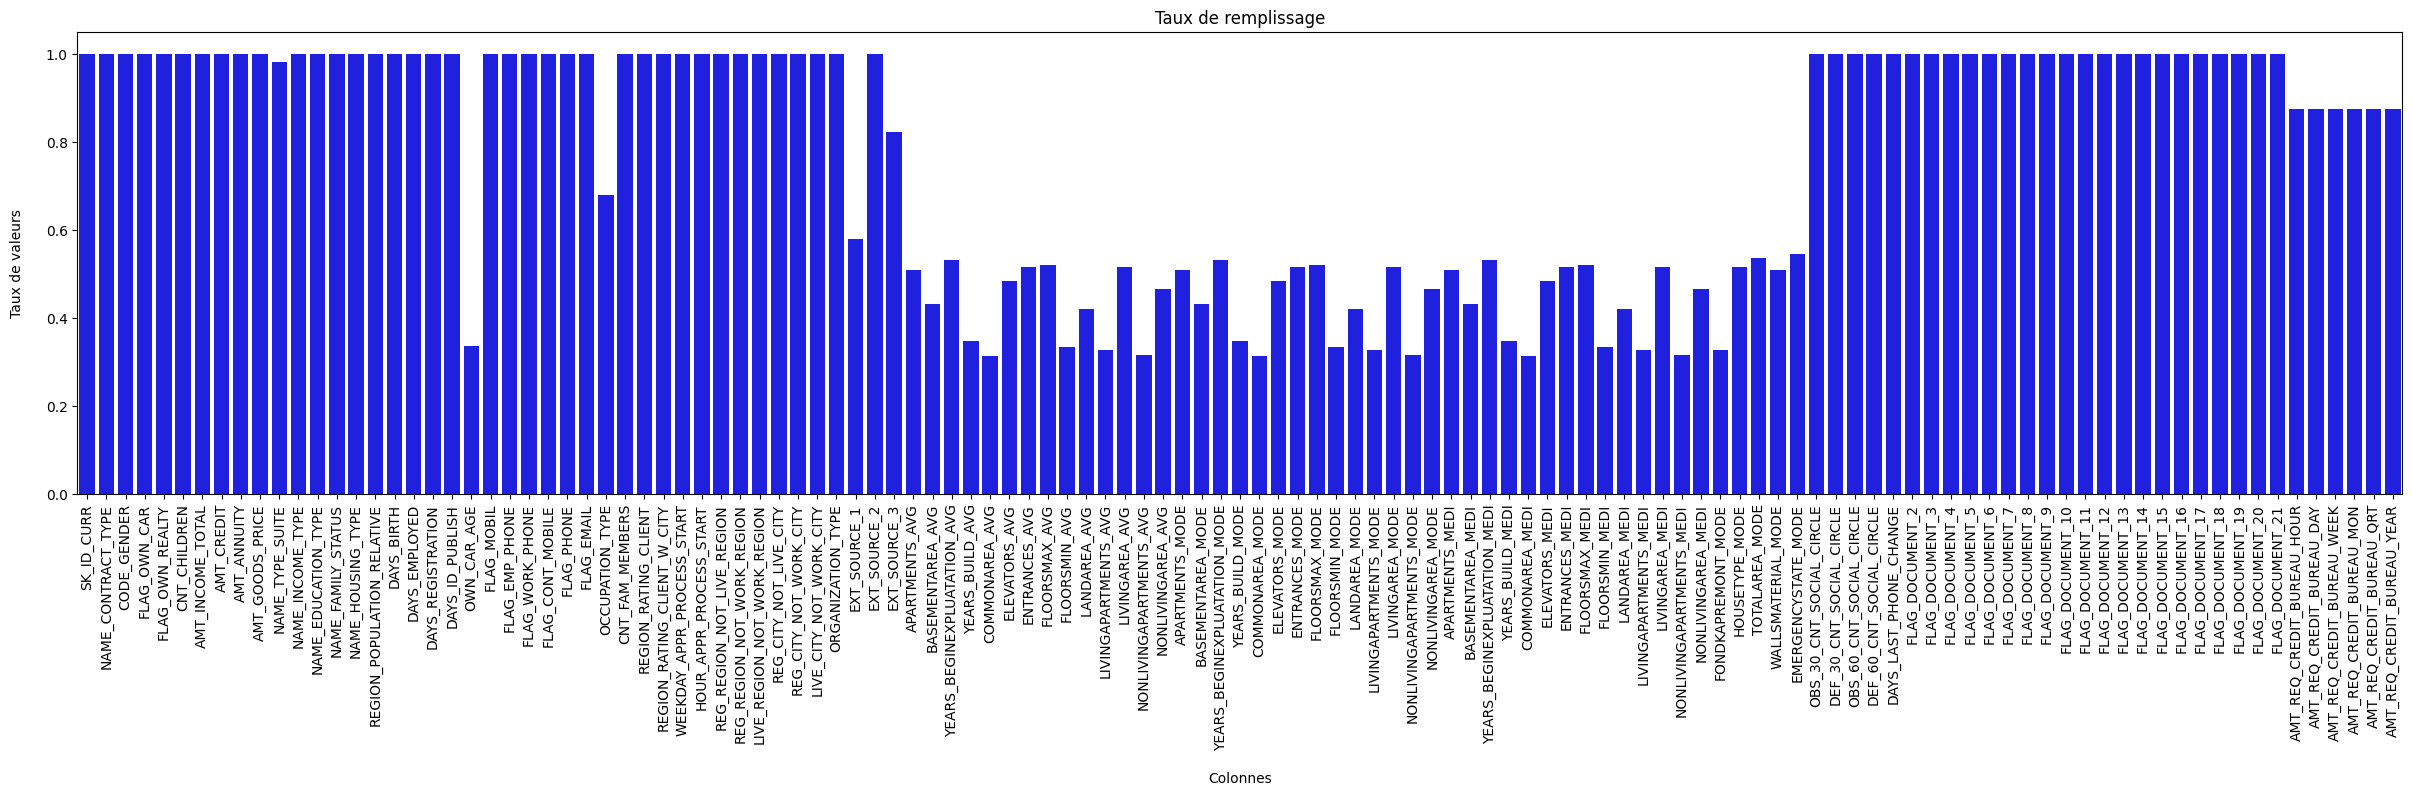

In [19]:
graphRemplissage(app_test)

On regarde plus en détail nos fichiers applications{train/test}

In [25]:
print ('train:',app_train.shape,'\n','test:',app_test.shape)

train: (307511, 122) 
 test: (48744, 121)


On regarde les types de données et on peut voir que nous avons une colonne supplémentaire ("TARGET") qui se trouve dans le dataset "app_train" et pas dans "app_test".

In [26]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [27]:
app_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

## Bureau

Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).
Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

In [30]:
bureau = pd.read_csv("data/bureau.csv")
bureau.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


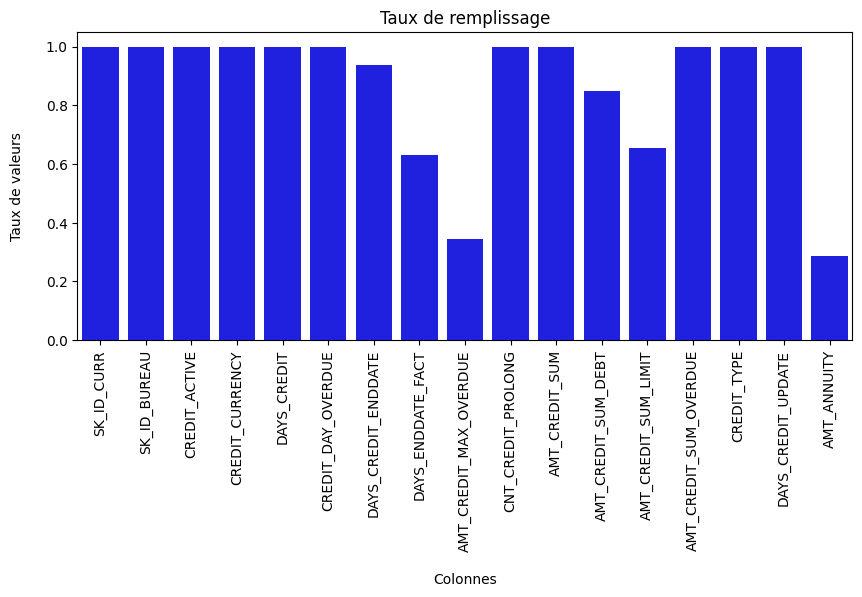

In [31]:
plt.rcParams["figure.figsize"] = (10, 4)
graphRemplissage(bureau)

## Bureau balance

Soldes mensuels des crédits antérieurs au bureau de crédit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit.

In [32]:
bureau_balance = pd.read_csv("data/bureau_balance.csv")
bureau_balance.head(3)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


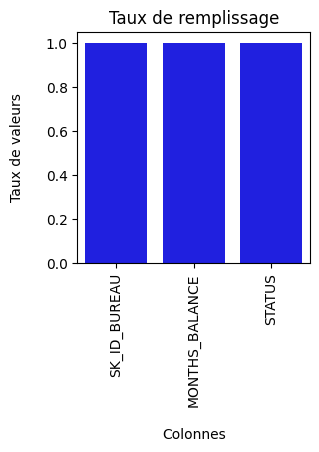

In [34]:
plt.rcParams["figure.figsize"] = (3, 3)
graphRemplissage(bureau_balance)

## Credit card balance

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon

In [35]:
credit = pd.read_csv("data/credit_card_balance.csv")
credit.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


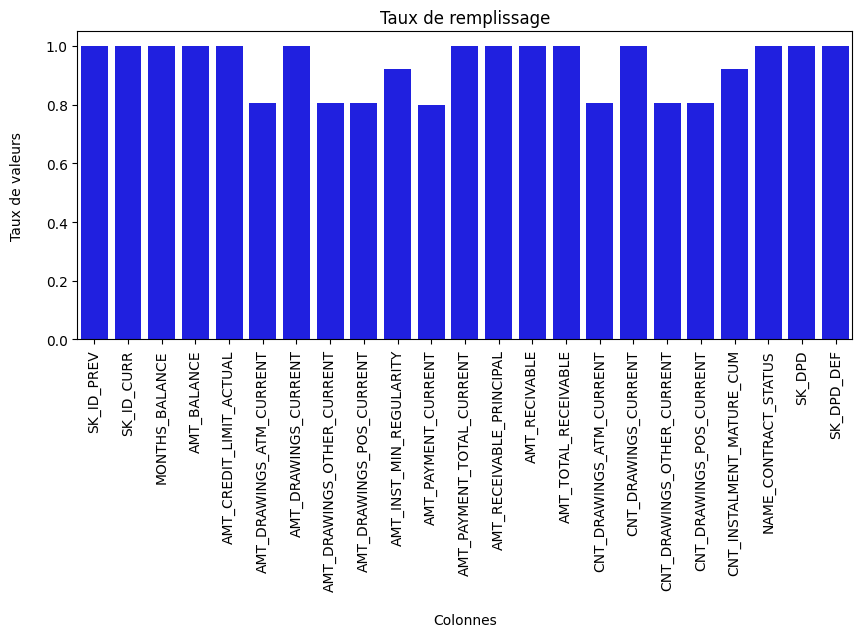

In [36]:
plt.rcParams["figure.figsize"] = (10, 4)
graphRemplissage(credit)

## Homecredit columns description

Ce fichier contient les descriptions des colonnes des différents fichiers de données.

In [37]:
HomeCredit = pd.read_csv("data/HomeCredit_columns_description.csv", encoding= 'unicode_escape')
HomeCredit.head(3)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN


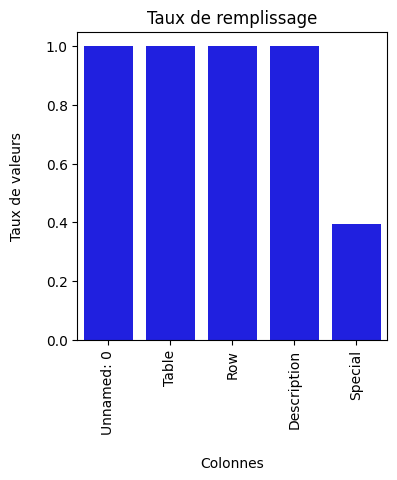

In [38]:
plt.rcParams["figure.figsize"] = (4, 4)
graphRemplissage(HomeCredit)

## Installments payments

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.
Il y a une ligne pour chaque paiement effectué plus une ligne pour chaque paiement manqué.
Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux prêts de notre échantillon.

In [39]:
install_pay = pd.read_csv("data/installments_payments.csv")
install_pay.head(3)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


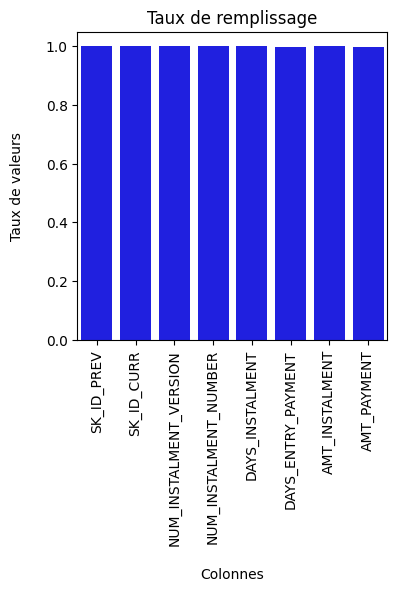

In [40]:
plt.rcParams["figure.figsize"] = (4, 4)
graphRemplissage(install_pay)

## Pos Cash balance

Soldes mensuels instantannés des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.
Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon.

In [41]:
POS_CASH = pd.read_csv("data/POS_CASH_balance.csv")
POS_CASH.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


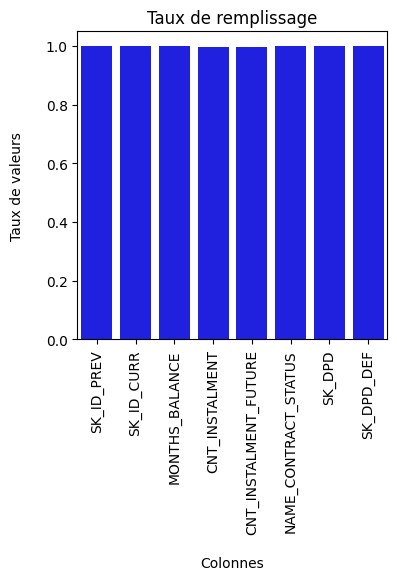

In [42]:
plt.rcParams["figure.figsize"] = (4, 4)
graphRemplissage(POS_CASH)

## Previous application

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

In [43]:
prev_appli = pd.read_csv("data/previous_application.csv")
prev_appli.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


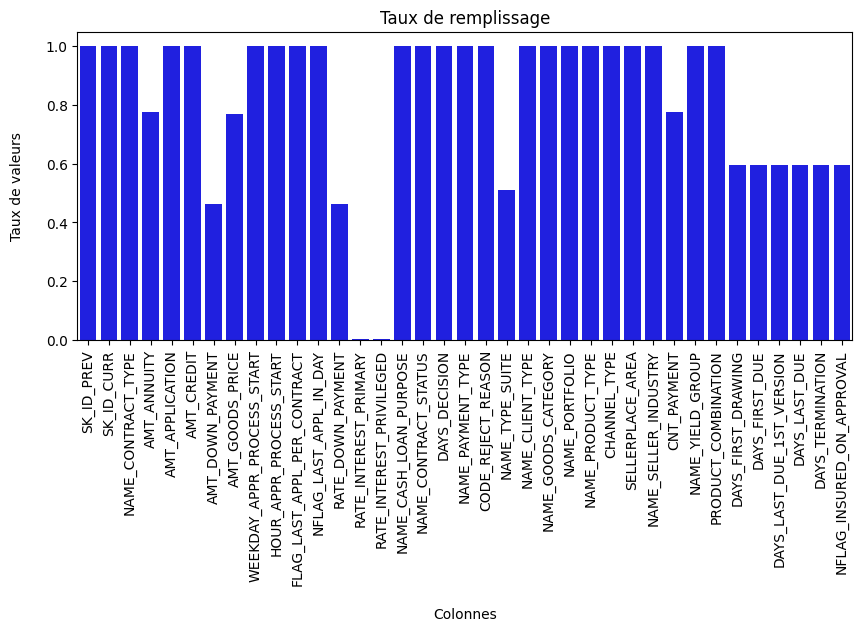

In [44]:
plt.rcParams["figure.figsize"] = (10, 4)
graphRemplissage(prev_appli)

## Sample submission

In [45]:
sample_sub = pd.read_csv("data/sample_submission.csv")
sample_sub.head(3)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5


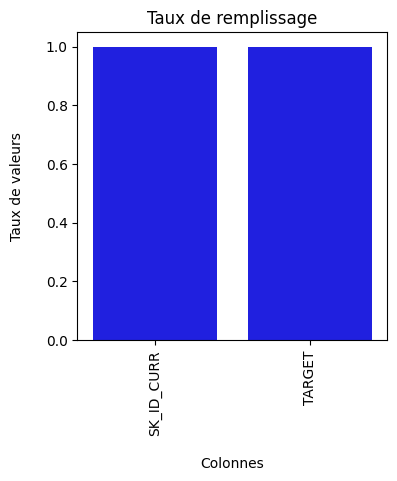

In [46]:
plt.rcParams["figure.figsize"] = (4, 4)
graphRemplissage(sample_sub)

# analyse exploratoire

On regarde la répartition de la valeur "TARGET" dans le fichier train. Cette valeur possède deux valeurs : 0 pour un client qui n'est pas en difficulté et 1 client en difficulté.

Avec ce graphique, on peut voir que les clients en écrasante majorité ne sont pas en difficultés..

Text(0.5, 1.0, 'Répartion de la valeur TARGET')

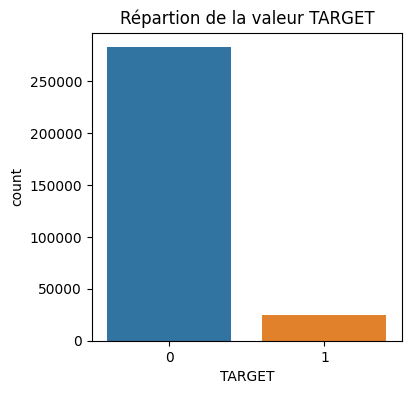

In [47]:
plt.rcParams["figure.figsize"] = (4, 4)
sns.countplot(data = app_train, x = "TARGET")
plt.title("Répartion de la valeur TARGET")

On va regarder la répartition du genre.
Avec ce graphique, on peut voir que plus de femmes demandent de prêts.

Text(0.5, 1.0, 'Répartition du genre')

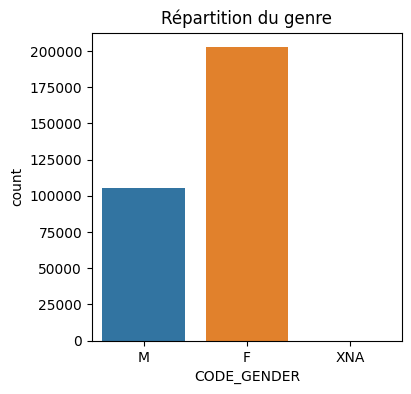

In [48]:
sns.countplot(data = app_train, x = "CODE_GENDER")
plt.title("Répartition du genre")

On va regarder le genre des demandeurs et regarder qui est en difficultés.
Avec le graphique du dessus, on avait vu que les femmes faisaient le plus de prêts et donc on peut voir que la majorité des clientes n'ont pas de problèmes. Les clients en difficultés ne représentent pas un genre en particulier.

Text(0.5, 1.0, 'Répartition du genre par rapport à la valeur TARGET')

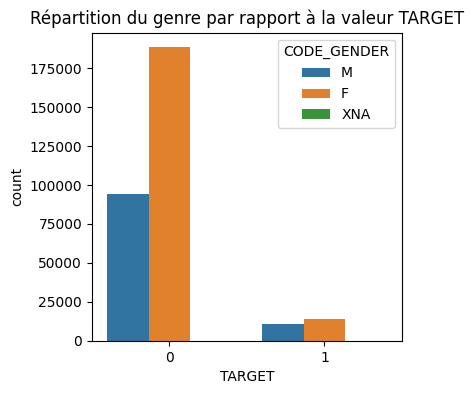

In [49]:
sns.countplot(data = app_train, x = 'TARGET', hue = "CODE_GENDER")
plt.title("Répartition du genre par rapport à la valeur TARGET")

Ensuite, on va regarder le nombre de client qui possède un bien immobilier et on peut constater que beaucoup ont déjà un bien immobillier et en majorité les femmes

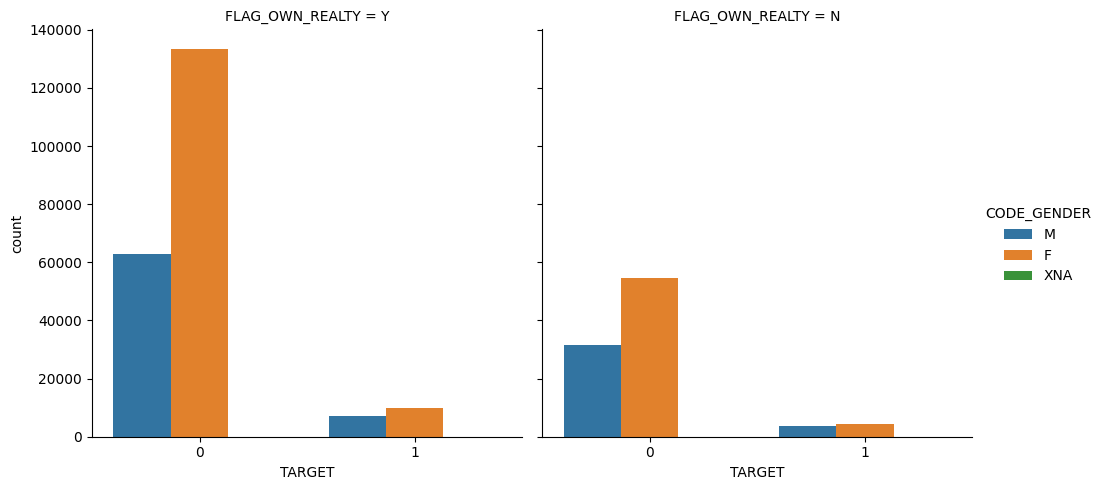

In [50]:
sns.catplot(data = app_train, x = 'TARGET', hue = "CODE_GENDER", col = 'FLAG_OWN_REALTY', kind="count")

On va regarder le type de contrat que le client à souscrit (prêt/renouveller) et séparer les clients en difficultés et voir si il possède un bien immobilier. On peut voir que beaucoup font un prêt et qui ont un bien immobilier et ceux qui possèdent pas de bien immobiler ont pris un prêt.

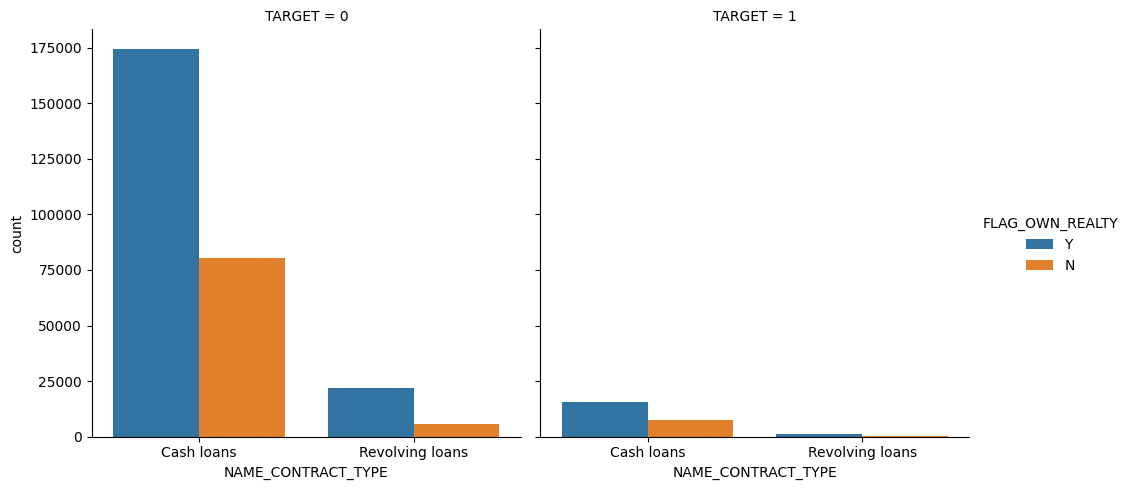

In [51]:
sns.catplot(data = app_train, col = 'TARGET', x = "NAME_CONTRACT_TYPE", hue = "FLAG_OWN_REALTY", kind="count")

Text(0.5, 1.0, 'Note des régions (1,2,3) ou le client vit')

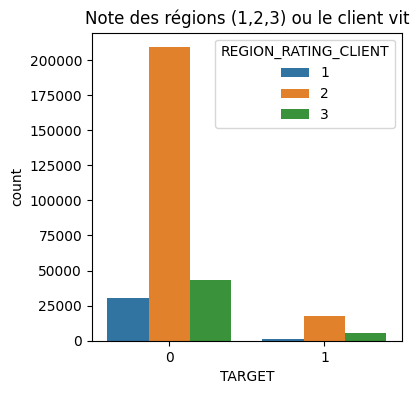

In [52]:
sns.countplot(data = app_train, x = 'TARGET', hue = "REGION_RATING_CLIENT")
plt.title("Note des régions (1,2,3) ou le client vit")

Pourcentage de la population ayant des diplômes

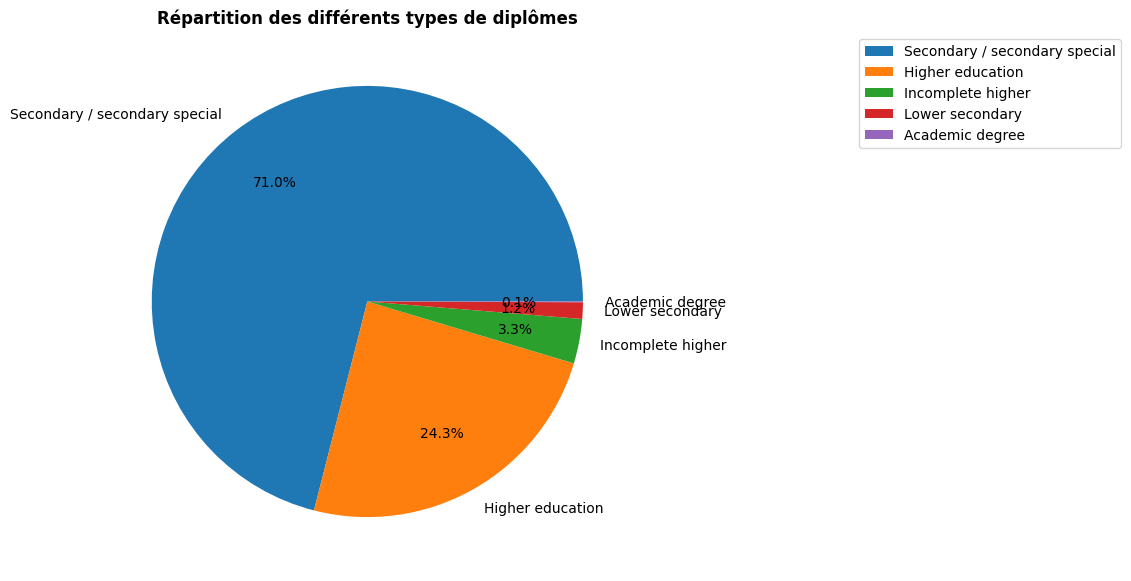

In [53]:
plt.rcParams["figure.figsize"] = (7,7)
plt.pie(app_train['NAME_EDUCATION_TYPE'].value_counts().values,
        labels = app_train['NAME_EDUCATION_TYPE'].value_counts().keys(),
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Répartition des différents types de diplômes", fontsize=12,fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Répartition des différents types de diplômes selon les TARGET')

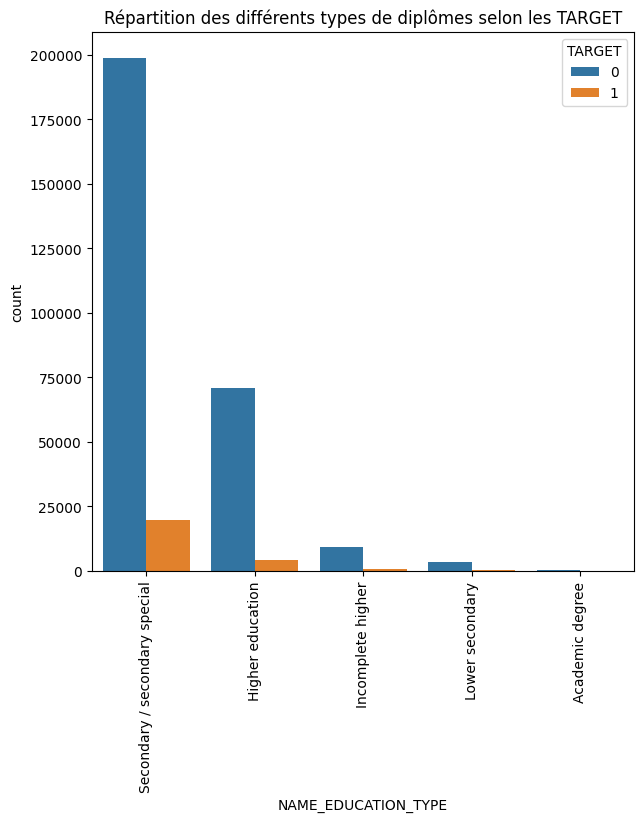

In [54]:
sns.countplot(data = app_train, x = 'NAME_EDUCATION_TYPE', hue = 'TARGET',
            order = app_train['NAME_EDUCATION_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Répartition des différents types de diplômes selon les TARGET")

La majorité des clients qui demandent des prêts n'ont pas d'enfants.

Text(0.5, 1.0, 'Nombre enfant par clients')

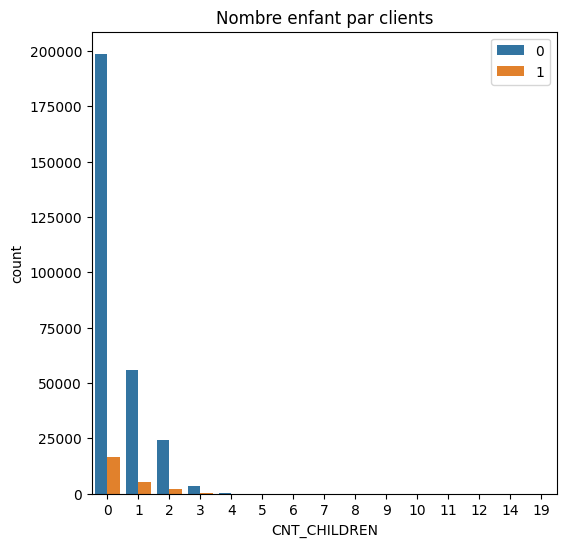

In [55]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.countplot(data = app_train, x = "CNT_CHILDREN", hue = 'TARGET')
plt.legend(loc='upper right')
plt.title("Nombre enfant par clients")

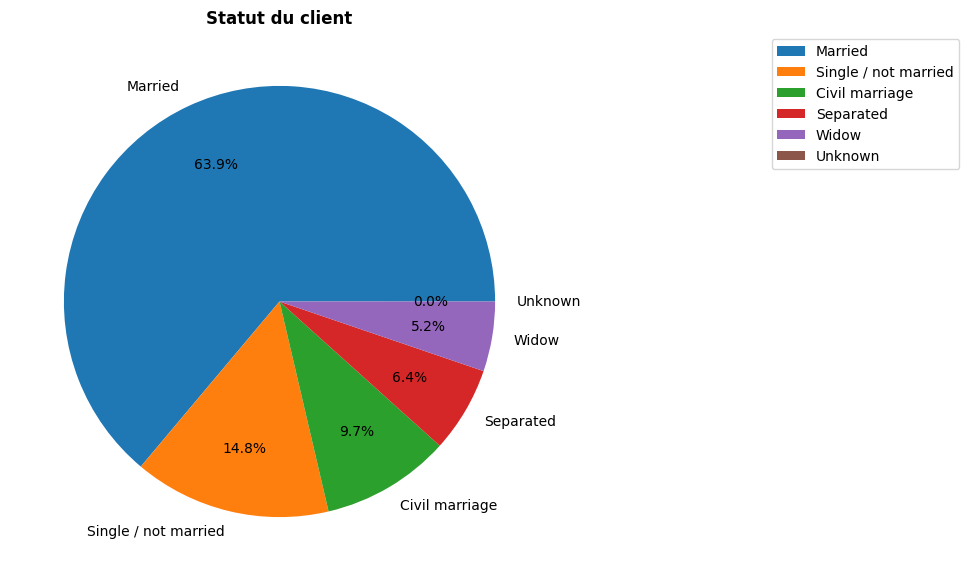

In [56]:
plt.rcParams["figure.figsize"] = (7,7)
plt.pie(app_train['NAME_FAMILY_STATUS'].value_counts().values,
        labels = app_train['NAME_FAMILY_STATUS'].value_counts().keys(),
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Statut du client", fontsize=12,fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Situation du clients')

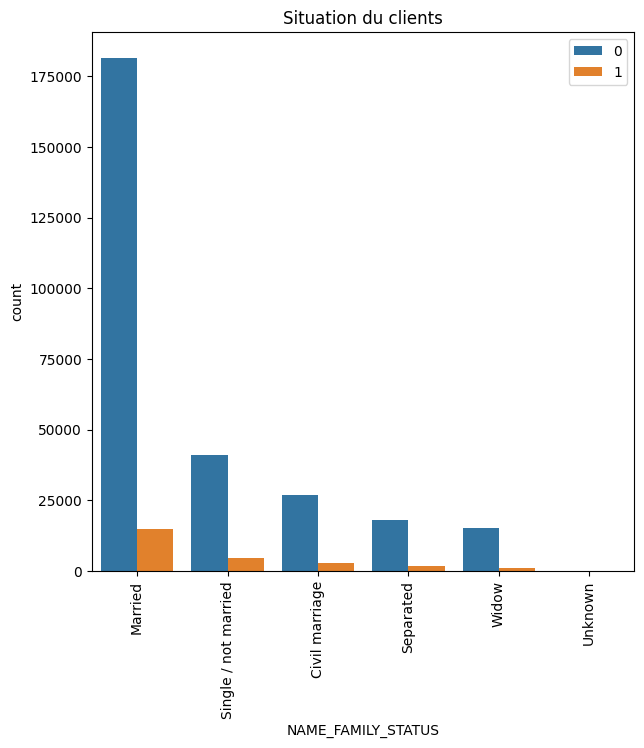

In [57]:
sns.countplot(data = app_train, x = 'NAME_FAMILY_STATUS', hue = 'TARGET',
                order = app_train['NAME_FAMILY_STATUS'].value_counts().index)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title("Situation du clients")

On va voir la répartition des prêts par genre et on peut constater que les prêts sont proches

Text(0.5, 1.0, 'Boxplot sur les crédits par rapport au genre et au TARGET')

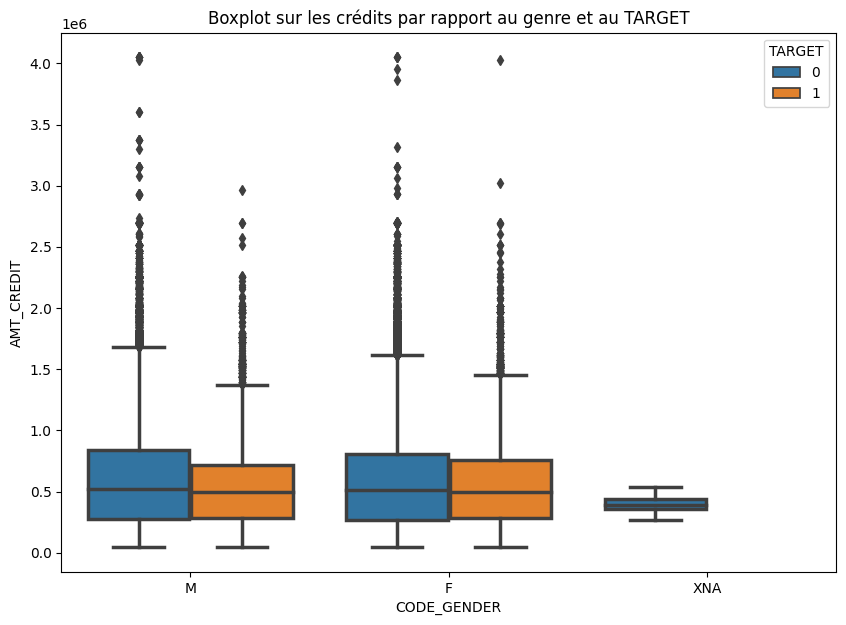

In [58]:
plt.rcParams["figure.figsize"] = (10,7)
sns.boxplot(data = app_train, x = 'CODE_GENDER', y = 'AMT_CREDIT',
                hue='TARGET', linewidth=2.5)
plt.title("Boxplot sur les crédits par rapport au genre et au TARGET")

Revenu du client, on supprime les outliers pour plus de visibilités.

Text(0.5, 1.0, 'Boxplot sur les revenus des clients par rapport au genre et au TARGET')

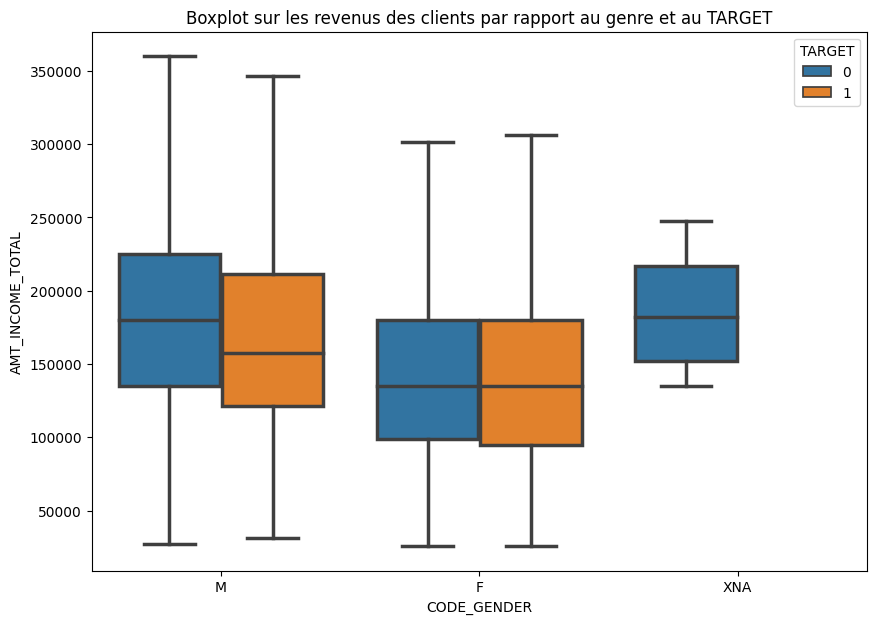

In [59]:
plt.rcParams["figure.figsize"] = (10,7)
sns.boxplot(data = app_train, x = 'CODE_GENDER', y = 'AMT_INCOME_TOTAL',
                hue='TARGET', linewidth=2.5, showfliers=False)
plt.title("Boxplot sur les revenus des clients par rapport au genre et au TARGET")

On va afficher un camembert des métiers, pour les métiers qui sont peu représentés, on va les mettre dans la catégorie "Autres". On créait un dataframe, on fai la somme des lignes et on renomme la ligne à "Autres".
Les valeurs "Autre" appartient :

*   Unemployed
*   Student
*   Businessman
*   Maternity leave

In [60]:
df = pd.DataFrame()
df["labels"] = app_train['NAME_INCOME_TYPE'].value_counts().keys()
df["values"] = app_train['NAME_INCOME_TYPE'].value_counts().values
print("Ancien dataframe :")
print(df)
print("##################################################")
df[4:] = df[4:].sum()
df = df[:5]
df["labels"][4] = "Autres"
print("Nouveau dataframe :")
print(df)

Ancien dataframe :
                 labels  values
0               Working  158774
1  Commercial associate   71617
2             Pensioner   55362
3         State servant   21703
4            Unemployed      22
5               Student      18
6           Businessman      10
7       Maternity leave       5
##################################################
Nouveau dataframe :
                 labels  values
0               Working  158774
1  Commercial associate   71617
2             Pensioner   55362
3         State servant   21703
4                Autres      55


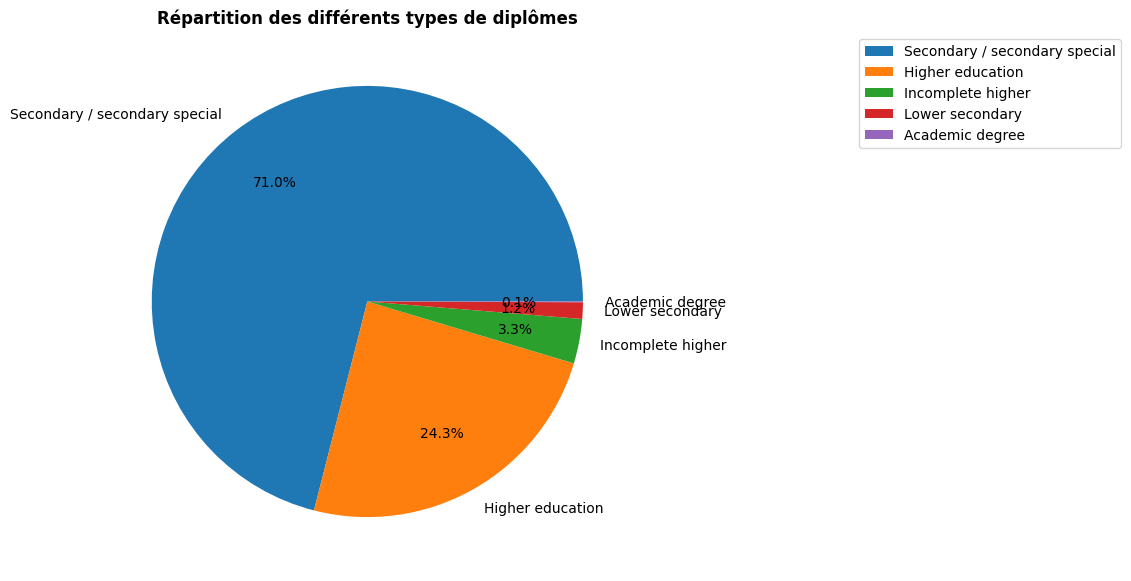

In [61]:
plt.rcParams["figure.figsize"] = (7,7)
plt.pie(app_train['NAME_EDUCATION_TYPE'].value_counts().values,
        labels = app_train['NAME_EDUCATION_TYPE'].value_counts().keys(),
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Répartition des différents types de diplômes", fontsize=12,fontweight = 'bold')
plt.show()

Les différents métiers par rapport aux targets

Text(0.5, 1.0, 'Le type de métier par rapport au target')

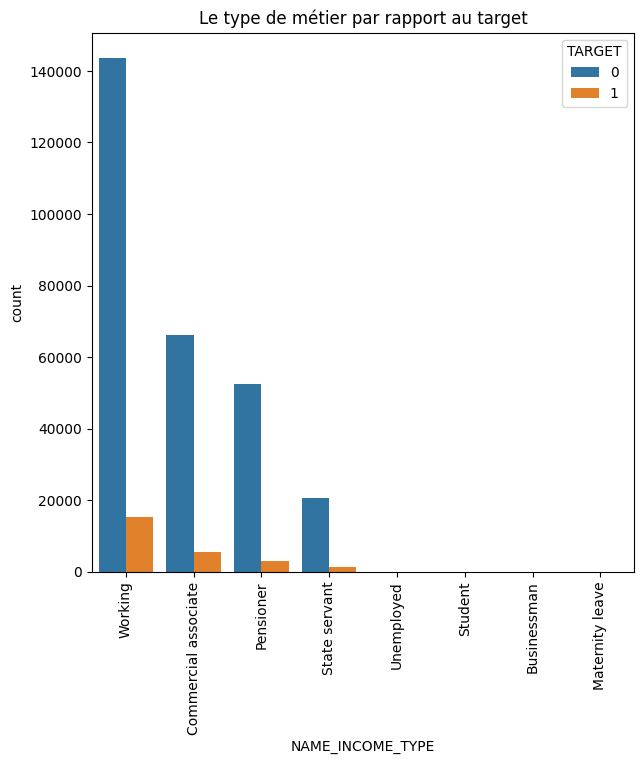

In [62]:
fig,ax = plt.subplots()
sns.countplot(data = app_train, hue = 'TARGET', x = 'NAME_INCOME_TYPE',
                order = app_train['NAME_INCOME_TYPE'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Le type de métier par rapport au target")

Text(0.5, 1.0, 'Les types de catégories des clients')

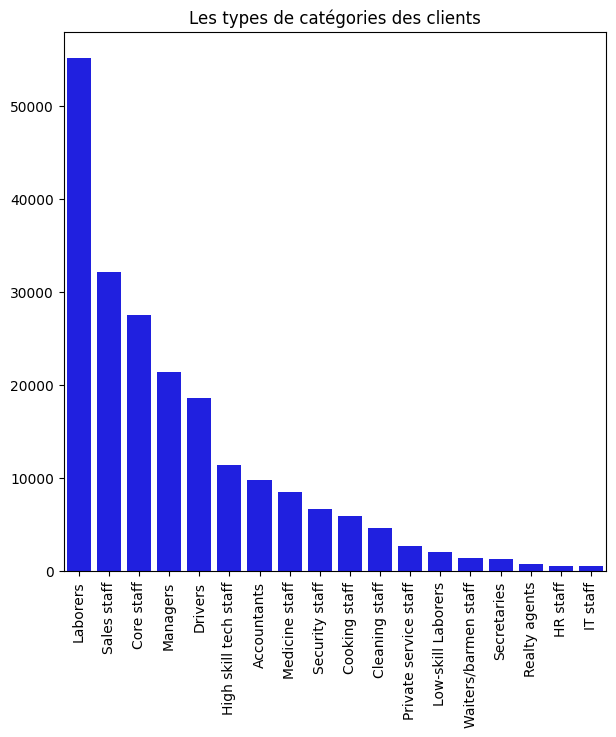

In [63]:
df = app_train["OCCUPATION_TYPE"].value_counts()
df = pd.DataFrame(df)

fig,ax = plt.subplots()
sns.barplot(data = df.T, color = 'blue')
ax.tick_params(axis='x', rotation=90)
plt.title("Les types de catégories des clients")

Text(0.5, 1.0, 'Les types de catégories des clients par rapport aux TARGET')

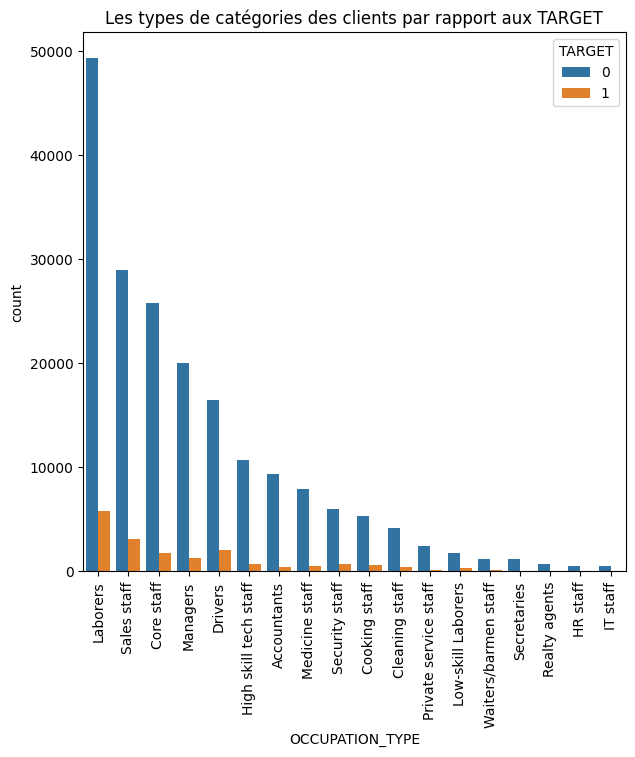

In [64]:
fig,ax = plt.subplots()
sns.countplot(data = app_train, x = "OCCUPATION_TYPE", hue = 'TARGET', order = app_train["OCCUPATION_TYPE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Les types de catégories des clients par rapport aux TARGET")

Text(0.5, 1.0, 'Les types de métiers des clients par rapport aux TARGET')

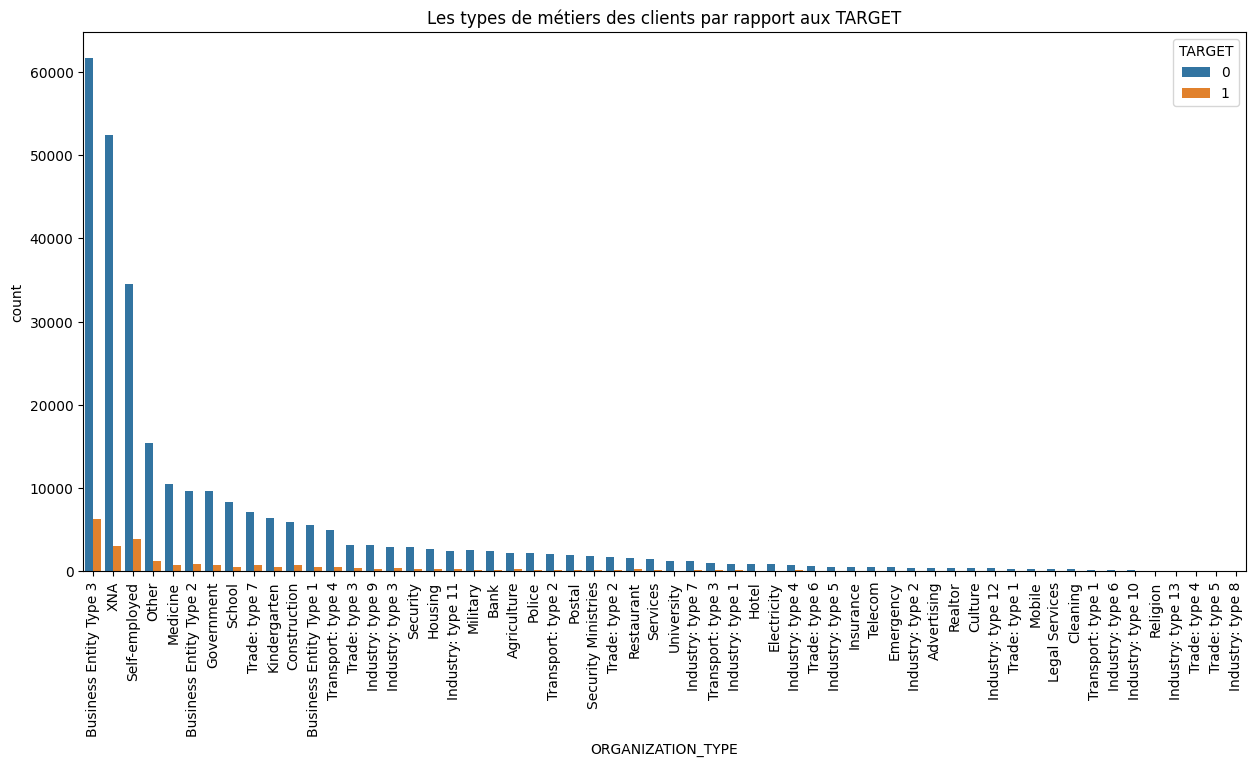

In [65]:
plt.rcParams["figure.figsize"] = (15,7)
fig,ax = plt.subplots()
sns.countplot(data = app_train, x = "ORGANIZATION_TYPE", hue = 'TARGET', order = app_train["ORGANIZATION_TYPE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Les types de métiers des clients par rapport aux TARGET")

Text(0.5, 1.0, 'Boxplot sur le prix des biens pour lesquels le prêt est accordé par rapport au genre et au TARGET')

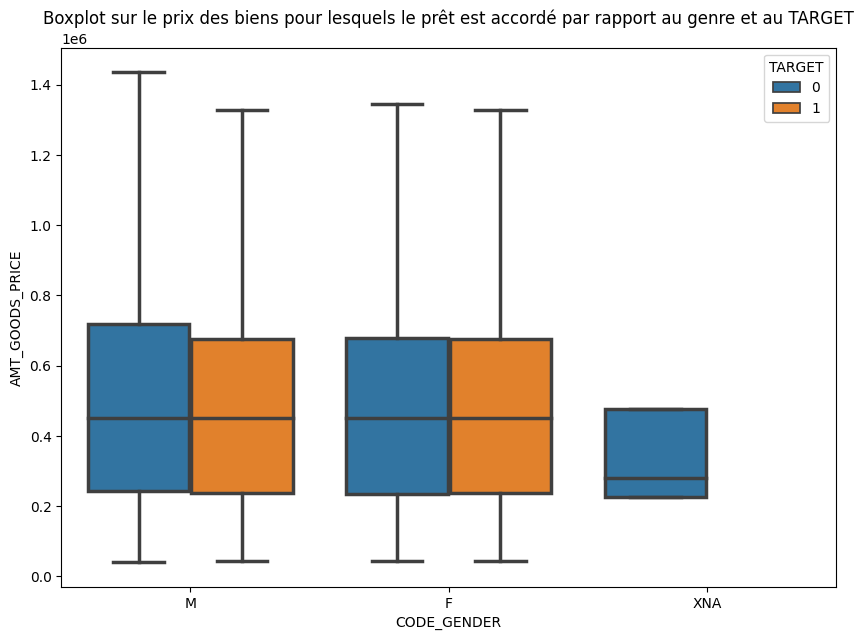

In [66]:
plt.rcParams["figure.figsize"] = (10,7)
sns.boxplot(data = app_train, x = 'CODE_GENDER', y = 'AMT_GOODS_PRICE',
                hue='TARGET', linewidth=2.5, showfliers=False)
plt.title("Boxplot sur le prix des biens pour lesquels le prêt est accordé par rapport au genre et au TARGET")

Text(0.5, 1.0, 'Boxplot sur la rente demandé par rapport au genre et au TARGET')

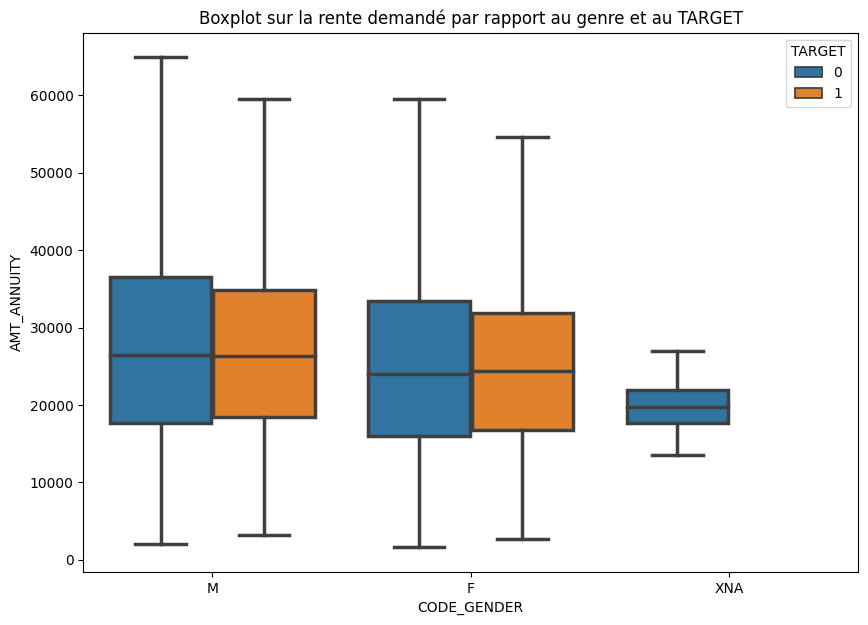

In [67]:
sns.boxplot(data = app_train, x='CODE_GENDER', y='AMT_ANNUITY',
                hue='TARGET', linewidth=2.5, showfliers=False)
plt.title("Boxplot sur la rente demandé par rapport au genre et au TARGET")

# Fusion 1 : Application train et Previous application

In [68]:
join_1 = app_train.join(prev_appli, how='left', on='SK_ID_CURR',
                                rsuffix='_previous')

join_1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Connectivity,10.0,high,POS mobile with interest,365243.0,-2004.0,-1734.0,-1914.0,-1908.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Connectivity,12.0,low_normal,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,5.0,low_normal,POS mobile without interest,365243.0,-1308.0,-1188.0,-1188.0,-1181.0,0.0


Text(0.5, 1.0, 'Noms des statuts contrats')

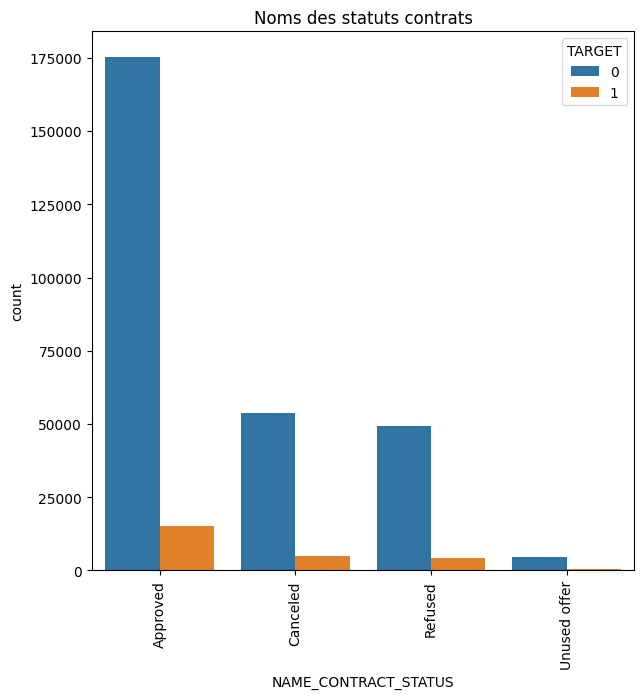

In [69]:
plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_1, x = "NAME_CONTRACT_STATUS", hue = 'TARGET', order = join_1["NAME_CONTRACT_STATUS"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Noms des statuts contrats")

In [70]:
df = pd.DataFrame()
df["labels"] = join_1['CODE_REJECT_REASON'].value_counts().keys()
df["values"] = join_1['CODE_REJECT_REASON'].value_counts().values
print("Ancien dataframe :")
print(df)
print("##################################################")
df[4:] = df[5:].sum()
df = df[:6]
df["labels"][5] = "Autres"
print("Nouveau dataframe :")
print(df)

Ancien dataframe :
   labels  values
0     XAP  249031
1      HC   32257
2   LIMIT   10518
3     SCO    6805
4  CLIENT    4853
5   SCOFR    2333
6     XNA     956
7   VERIF     611
8  SYSTEM     147
##################################################
Nouveau dataframe :
                labels  values
0                  XAP  249031
1                   HC   32257
2                LIMIT   10518
3                  SCO    6805
4  SCOFRXNAVERIFSYSTEM    4047
5               Autres    4047


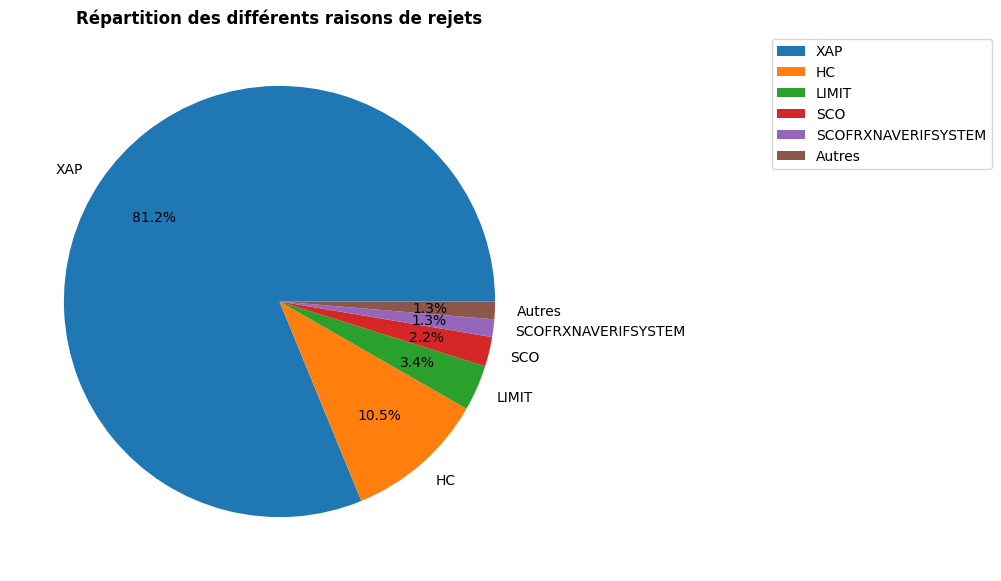

In [72]:
plt.rcParams["figure.figsize"] = (7,7)
plt.pie(df['values'],
        labels = df['labels'],
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Répartition des différents raisons de rejets", fontsize=12,fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Nombre de clients par motif de rejet et propriété immobilière')

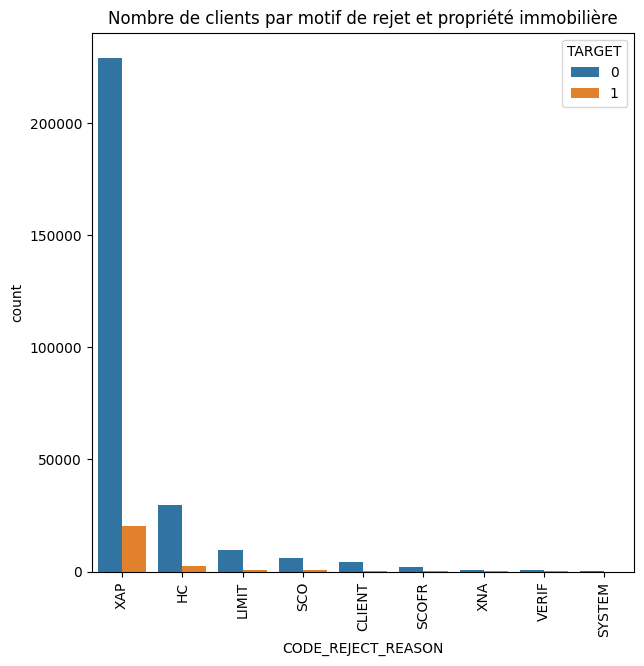

In [73]:
plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_1, x = "CODE_REJECT_REASON", hue = 'TARGET', order = join_1["CODE_REJECT_REASON"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.title("Nombre de clients par motif de rejet et propriété immobilière")

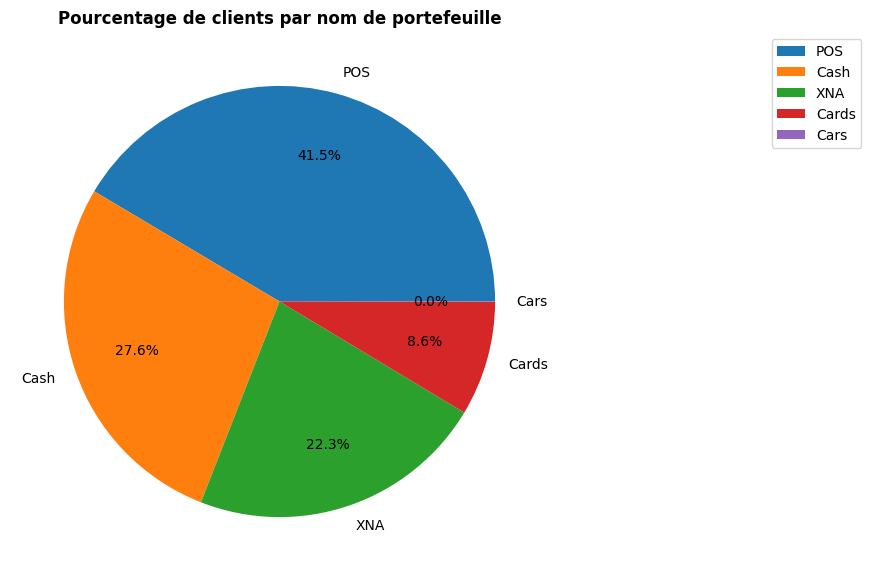

In [74]:
plt.rcParams["figure.figsize"] = (7,7)
plt.pie(join_1['NAME_PORTFOLIO'].value_counts().values,
        labels = join_1['NAME_PORTFOLIO'].value_counts().keys(),
        autopct='%1.1f%%', pctdistance = 0.7)
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper left')
plt.title("Pourcentage de clients par nom de portefeuille", fontsize=12,fontweight = 'bold')
plt.show()

#  Application train et Pos_Cash

In [75]:
join_2 = join_1.join(POS_CASH, how='left', on='SK_ID_CURR',
                                rsuffix='_POS_CASH')
join_2.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_PREV_POS_CASH,SK_ID_CURR_POS_CASH,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_POS_CASH,SK_DPD,SK_DPD_DEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1908.0,0.0,2415125,200227,-32,12.0,12.0,Active,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,1659576,291776,-35,12.0,12.0,Active,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-1181.0,0.0,1480411,365683,-33,12.0,12.0,Active,0,0


Text(0.5, 1.0, 'Nombre de versements futurs par cible')

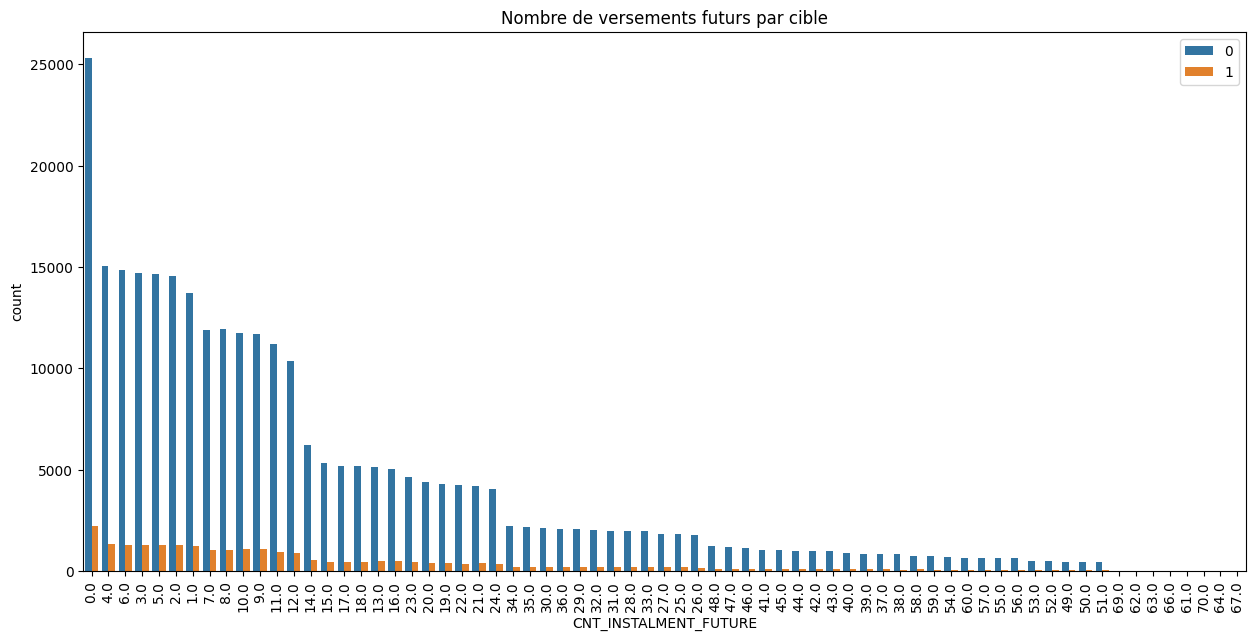

In [76]:
plt.rcParams["figure.figsize"] = (15,7)
fig,ax = plt.subplots()
sns.countplot(data = join_2, x = "CNT_INSTALMENT_FUTURE", hue = 'TARGET', order = join_2["CNT_INSTALMENT_FUTURE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de versements futurs par cible")

Text(0.5, 1.0, 'Nombre de clients dans chaque classe cible par statut des noms de contrats')

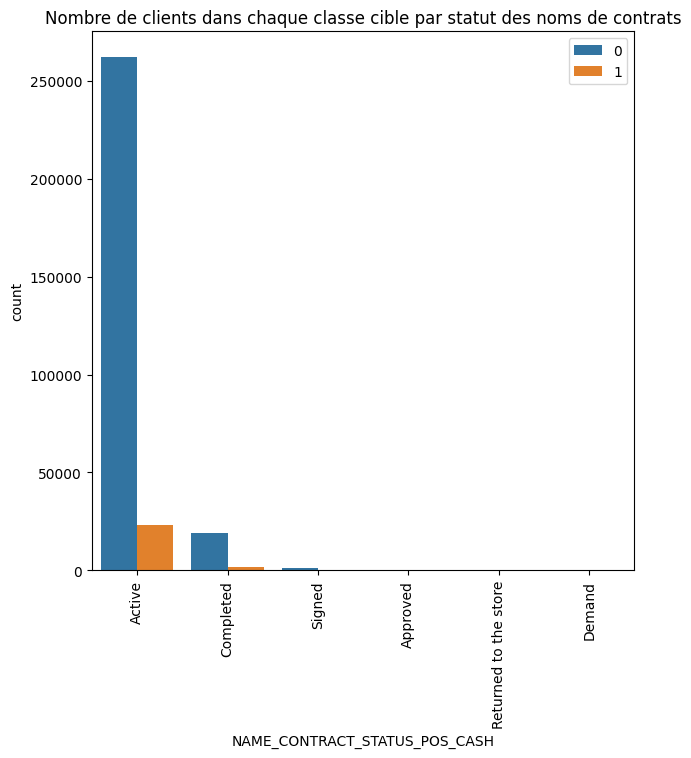

In [77]:
plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_2, x = "NAME_CONTRACT_STATUS_POS_CASH", hue = 'TARGET',
                order = join_2["NAME_CONTRACT_STATUS_POS_CASH"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de clients dans chaque classe cible par statut des noms de contrats")

# Fusison 3 : Application train et Credit

In [79]:
join_3 = join_2.join(credit, how='left', on='SK_ID_CURR',
                                rsuffix='_credit')
join_3.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS_credit,SK_DPD_credit,SK_DPD_DEF_credit
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0,0.0,0.0,17.0,Active,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


Text(0.5, 1.0, 'Nombre de clients dans chaque classe cible par statut des noms de contrats credit')

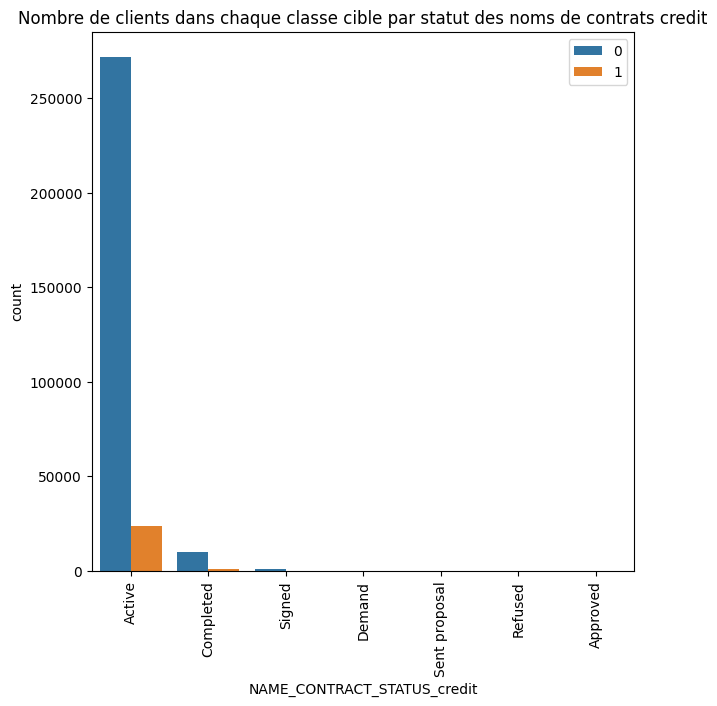

In [80]:
plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_3, x = "NAME_CONTRACT_STATUS_credit", hue = 'TARGET',
                order = join_3["NAME_CONTRACT_STATUS_credit"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de clients dans chaque classe cible par statut des noms de contrats credit")

# Fusion 4 : Application train et Bureau

In [81]:
join_4 = join_3.join(bureau, how='left', on='SK_ID_CURR',
                                rsuffix='_bureau')
join_4.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_bureau
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2320.0,NaN,0,58590.99,0.0,NaN,0.0,Consumer credit,-762,12681.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1090.0,NaN,0,91881.00,0.0,0.0,0.0,Consumer credit,-1085,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-1275.0,NaN,0,183829.50,0.0,0.0,0.0,Consumer credit,-1266,12681.0


Text(0.5, 1.0, 'Nombre de clients dans chaque classe cible par crédit actif')

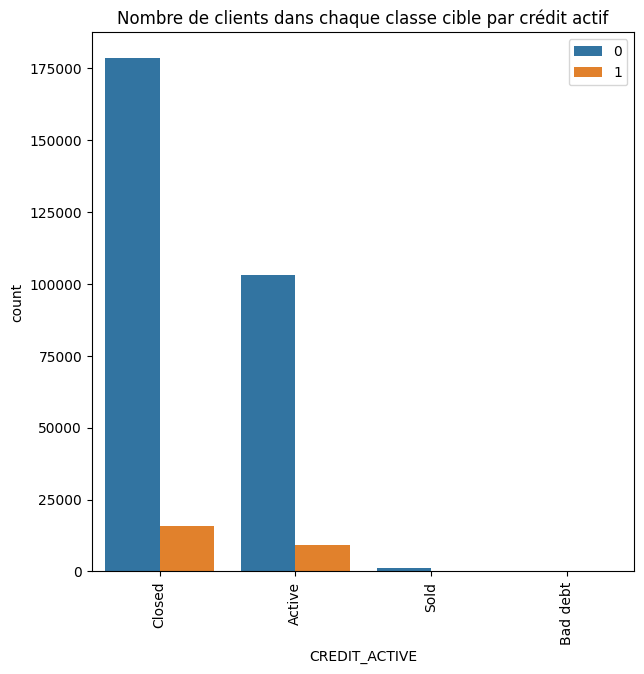

In [82]:
plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_4, x = "CREDIT_ACTIVE", hue = 'TARGET',
                order = join_4["CREDIT_ACTIVE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de clients dans chaque classe cible par crédit actif")

Text(0.5, 1.0, 'Nombre de clients dans chaque classe cible par type de crédit')

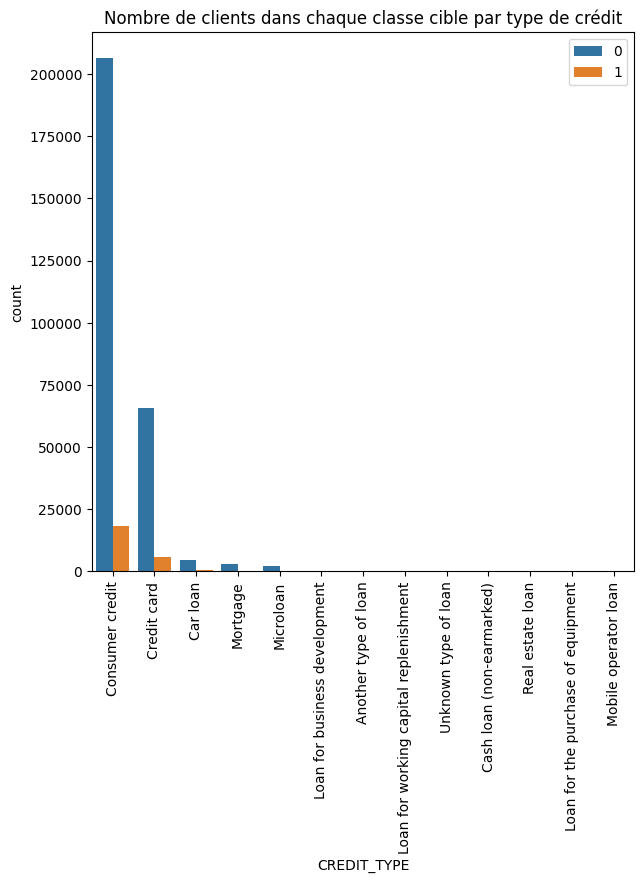

In [83]:
plt.rcParams["figure.figsize"] = (7,7)
fig,ax = plt.subplots()
sns.countplot(data = join_4, x = "CREDIT_TYPE", hue = 'TARGET',
                order = join_4["CREDIT_TYPE"].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
plt.title("Nombre de clients dans chaque classe cible par type de crédit")

# Nettoyage des données

Après l'analyse exploratoire, on va nettoyer les données.

## Gestion des outliers

Maintenant, nous allons nous observer les outliers et examiner la colonne : "BAYS_BIRTH" ont des valeurs négatives. Pour pouvoir l'analyser, on va diviser par (-365) pour qu'on puisse facilement l'analyser. On va analyser les colonnes qui représentent des dates.

In [84]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Il est nécessaire de modifier cette variable pour abtenir un chiffre facilement compréhensible plutôt que de garder un chiffre négatif qui est marque l'enregistrement du client.

In [85]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

On va afficher les âges des clients et si c'est un client à risque ou pas.

Text(0.5, 1.0, 'Âge des clients')

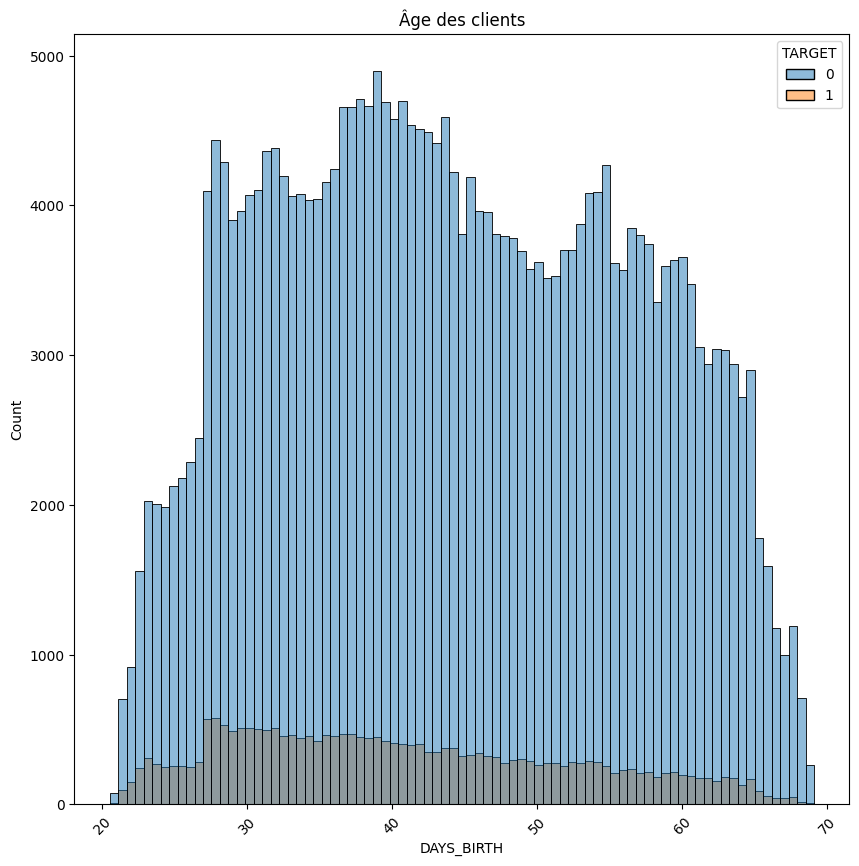

In [86]:
app_train['DAYS_BIRTH'] = np.abs(app_train['DAYS_BIRTH'])/365
app_test['DAYS_BIRTH'] = np.abs(app_test['DAYS_BIRTH'])/365

plt.rcParams["figure.figsize"] = (10, 10)
sns.histplot(data = app_train, x = 'DAYS_BIRTH', hue = 'TARGET')
plt.xticks(rotation=45)
plt.title("Âge des clients")

Maintenant que nous avons vu la colonne âge, on va regarder le nombres de jours de travail des client.

In [88]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [89]:
app_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

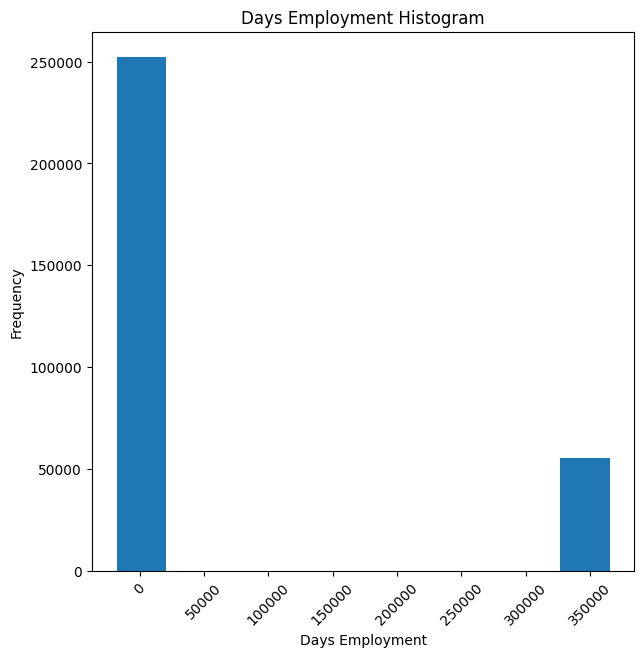

In [90]:
plt.rcParams["figure.figsize"] = (7, 7)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xticks(rotation=45)
plt.xlabel('Days Employment')

Ici, on peut voir un problème, dans le code, on peut voir que le "max" représente 1000 années. Je vais regarder si c'est un individu isolé.

In [91]:
print("%0.0f valeurs avec 365243 jours employés pour les données" %
      len(app_train[app_train['DAYS_EMPLOYED'] == 365243]))
print("%0.0f valeurs totales des jours employés pour les données" % app_train.shape[0])
print("***********************")
print("%0.0f valeurs avec 365243 jours employés pour les données" %
      len(app_test[app_test['DAYS_EMPLOYED'] == 365243]))
print("%0.0f valeurs totales des jours employés pour les données" % app_test.shape[0])

55374 valeurs avec 365243 jours employés pour les données
307511 valeurs totales des jours employés pour les données
***********************
9274 valeurs avec 365243 jours employés pour les données
48744 valeurs totales des jours employés pour les données


In [92]:
app_train['DAYS_EMPLOYED_OUTLIERS'] = app_train["DAYS_EMPLOYED"] == 365243
app_test['DAYS_EMPLOYED_OUTLIERS'] = app_test["DAYS_EMPLOYED"] == 365243

#Replace outliers values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

Text(0.5, 0, 'Days Employment')

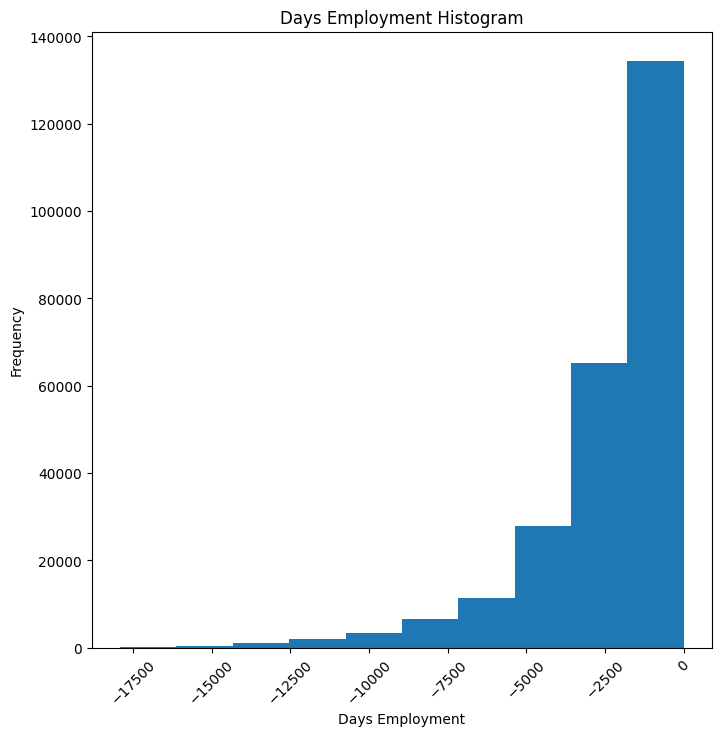

In [93]:
plt.rcParams["figure.figsize"] = (8, 8)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xticks(rotation=45)
plt.xlabel('Days Employment')

## Gestion des valeurs manquantes

On va s'attaquer aux valeurs manquantes, aux outliers et aux doublons.

In [94]:
col_int_train = app_train.select_dtypes(include = 'int64')
print(pd.DataFrame(col_int_train.isnull().sum().sort_values(ascending = False)))
print("############################################")
col_int_test = app_test.select_dtypes(include = 'int64')
print(pd.DataFrame(col_int_test.isnull().sum().sort_values(ascending = False)))

                             0
SK_ID_CURR                   0
FLAG_DOCUMENT_12             0
FLAG_DOCUMENT_5              0
FLAG_DOCUMENT_6              0
FLAG_DOCUMENT_7              0
FLAG_DOCUMENT_8              0
FLAG_DOCUMENT_9              0
FLAG_DOCUMENT_10             0
FLAG_DOCUMENT_11             0
FLAG_DOCUMENT_13             0
FLAG_DOCUMENT_3              0
FLAG_DOCUMENT_14             0
FLAG_DOCUMENT_15             0
FLAG_DOCUMENT_16             0
FLAG_DOCUMENT_17             0
FLAG_DOCUMENT_18             0
FLAG_DOCUMENT_19             0
FLAG_DOCUMENT_20             0
FLAG_DOCUMENT_4              0
FLAG_DOCUMENT_2              0
TARGET                       0
FLAG_EMAIL                   0
CNT_CHILDREN                 0
DAYS_ID_PUBLISH              0
FLAG_MOBIL                   0
FLAG_EMP_PHONE               0
FLAG_WORK_PHONE              0
FLAG_CONT_MOBILE             0
FLAG_PHONE                   0
REGION_RATING_CLIENT         0
LIVE_CITY_NOT_WORK_CITY      0
REGION_R

On peut voir que les valeurs entières ne possèdent pas de valeurs manquantes.

In [95]:
col_float_train = app_train.select_dtypes(include = 'float64')
print(pd.DataFrame(col_float_train.isnull().sum().sort_values(ascending = False)))
print("############################################")
col_float_test = app_test.select_dtypes(include = 'float64')
print(pd.DataFrame(col_float_test.isnull().sum().sort_values(ascending = False)))

                                 0
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
...                            ...
AMT_CREDIT                       0
DAYS_REGISTRATION                0
DAYS_BIRTH                       0
REGION_POPULATION_RELATIVE       0
AMT_INCOME_TOTAL                 0

[67 rows x 1 columns]
############################################
                                0
COMMONAREA_MEDI             33495
COMMONAREA_AVG              33495
COMMONAREA_MODE             33495
NONLIVINGAPARTMENTS_AVG     33347
NONLIVINGAPARTMENTS_MODE    33347
...                           ...
DAYS_REGISTRATION               0
DAYS_BIRTH                      0
REGION_POPULATION_RELATIVE      0
AMT_GOODS_PRICE                 0
AMT_INCOME_TOTAL                0

[67 rows x 1 columns]


Pour les float, on va regarder comment on va imputer les valeurs manquantes.

In [96]:
col_obj_train = app_train.select_dtypes(include = 'object')
print(pd.DataFrame(col_obj_train.isnull().sum().sort_values(ascending = False)))
print("############################################")
col_obj_test = app_test.select_dtypes(include = 'object')
print(pd.DataFrame(col_obj_test.isnull().sum().sort_values(ascending = False)))

                                 0
FONDKAPREMONT_MODE          210295
WALLSMATERIAL_MODE          156341
HOUSETYPE_MODE              154297
EMERGENCYSTATE_MODE         145755
OCCUPATION_TYPE              96391
NAME_TYPE_SUITE               1292
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
############################################
                                0
FONDKAPREMONT_MODE          32797
WALLSMATERIAL_MODE          23893
HOUSETYPE_MODE              23619
EMERGENCYSTATE_MODE         22209
OCCUPATION_TYPE             15605
NAME_TYPE_SUITE               911
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY     

On va examiner les 6 variables qui possèdent des valeurs manquantes et on va remplacer les valeurs manquantes soit par les valeurs ou il est écrit : autre, non spécifié, etc ou sinon à la valeur la plus haute.

In [97]:
col_obj_train["FONDKAPREMONT_MODE"].value_counts()

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64

On remplacera les valeurs manquantes pas "not specified"

In [98]:
col_obj_train["WALLSMATERIAL_MODE"].value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

On remplacera les valeurs manquantes pas "Others"

In [99]:
col_obj_train["HOUSETYPE_MODE"].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

On remplacera les valeurs manquantes pas "block of flats"

In [100]:
col_obj_train["EMERGENCYSTATE_MODE"].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

On remplacera les valeurs manquantes pas "No"

In [101]:
col_obj_train["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

On remplacera les valeurs manquantes pas "Laborers"

In [102]:
col_obj_train["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

On remplacera les valeurs manquantes pas "Unaccompanied"

### Les types 'object'

In [103]:
from sklearn.impute import SimpleImputer

col = ["HOUSETYPE_MODE", "EMERGENCYSTATE_MODE", "OCCUPATION_TYPE", "NAME_TYPE_SUITE"]

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

app_train[col] = imp.fit_transform(app_train[col])
app_test[col] = imp.fit_transform(app_test[col])

In [104]:
app_train["FONDKAPREMONT_MODE"] = app_train["FONDKAPREMONT_MODE"].fillna('not specified')
app_test["FONDKAPREMONT_MODE"] = app_test["FONDKAPREMONT_MODE"].fillna('not specified')

In [105]:
app_train["WALLSMATERIAL_MODE"] = app_train["WALLSMATERIAL_MODE"].fillna('Others')
app_test["WALLSMATERIAL_MODE"] = app_test["WALLSMATERIAL_MODE"].fillna('Others')

### Les types "float64"

In [106]:
col = col_float_train.columns
data_imputed = app_train[col]
imp = SimpleImputer(missing_values=np.nan, strategy='median')
app_train.loc[:,col] = imp.fit_transform(data_imputed[col])

col = col_float_test.columns
data_imputed = app_test[col]
imp = SimpleImputer(missing_values=np.nan, strategy='median')
app_test.loc[:,col] = imp.fit_transform(data_imputed[col])

## Gestion des doublons

Les données sont maintenant complète, on supprime les doublons de nos deux dossiers.

In [107]:
app_train.drop_duplicates(inplace = True)
app_test.drop_duplicates(inplace = True)

## sauvegarder les tableaux

In [108]:
app_train.to_csv("data/app_train.csv", index=False)
app_test.to_csv("data/app_test.csv", index=False)